# Tabla de Contenido

<a id='tabla'></a>

* [1.1 Procesamiento y lectura de dataframes](#as1)
    * [1.1.1 Conversion al idioma español de nuestro campo Hypothesis](#as2)
    * [1.1.2 Evaluando nulos y duplicados](#as3)
* [2.1 Priorizar hipótesis](#as4)
    * [2.1.1 Comprobar que no haya visitantes duplicados en ambos grupos](#as5)
    * [2.1.2 Calcular ICE y RICE](#as6)
    * [2.1.3 Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE.](#as7)
* [3.1 Análisis del test A/B](#as8)
    * [3.1.1 Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas](#as9)
    * [3.1.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.](#as10)
    * [3.1.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas](#as11)
    * [3.1.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.](#as12)
    * [3.1.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.](#as13)
    * [3.1.6 Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.](#as14)
    * [3.1.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.](#as15)
    * [3.1.8 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.](#as16)
    * [3.1.9 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.](#as17)
    * [3.1.10 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.](#as18)
    * [3.10.11 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.](#as19)
    * [3.10.12 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.](#as20)
* [4.1 Conclusiones](#as21)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from IPython.display import display_html
from scipy.stats import ttest_ind
from googletrans import Translator
import datetime as dt

In [2]:
# Leer los archivos CSV y asignarles nombres

visits = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-10/visitors_us.csv')  # Nuevo nombre para este archivo
orders = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-10/orders_us.csv')  # Nuevo nombre para este archivo
hypotheses = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-10/hypothesis.csv')  # Nuevo nombre para este archivo


# 1.1 Procesamiento y lectura de dataframes <a id='as1'></a>

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [4]:
visits.head(n=5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head(n=5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [7]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


#### 1.1.1 Conversion al idioma español de nuestro campo Hypothesis <a id='as2'></a>

In [8]:
translator = Translator()

hypotheses['Hypothesis'] = hypotheses['Hypothesis'].apply(lambda x: translator.translate(x, src='ru', dest='es').text)

In [9]:
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,Agregue dos nuevos canales para atraer tráfico...,3,10,8,6
1,"Inicie su propio servicio de entrega, lo que r...",2,5,4,10
2,Agregue bloques de las recomendaciones de los ...,8,3,7,3
3,"Cambiar la estructura de las categorías, lo qu...",8,3,3,8
4,Cambiar los antecedentes de la página principa...,3,1,1,1
5,Agregue la página de revisiones de clientes so...,3,2,2,3
6,Mostrar en los pancartas de la página principa...,5,3,8,3
7,Agregue el formulario de suscripción para toda...,10,7,8,5
8,Lanzar una promoción que brinde un descuento e...,1,9,9,5


#### 1.1.2. Evaluando nulos y duplicados <a id='as3'></a>

In [10]:
# Evaluando si hay nulos

orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
orders.duplicated(keep=False).sum()

np.int64(0)

In [12]:
# Evaluando si hay nulos

visits.isna().sum()

date      0
group     0
visits    0
dtype: int64

In [13]:
visits.duplicated(keep=False).sum()

np.int64(0)

# 2.1 Priorizar hipótesis <a id='as4'></a>

#### 2.1.1 Comprobar que no haya visitantes duplicados en ambos grupos <a id='as5'></a>

In [14]:
display(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [15]:
# Evaluar que vistorID se encuentra presente en ambos grupos

# Agrupamos los el id de los visitantes por grupo

visitors_groupby = orders.groupby('visitorId')['group'].nunique().reset_index()
display(visitors_groupby)

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [16]:
# Filtrar que visitantes se encuentra en mas de un grupo

duplicated_visitors = visitors_groupby[visitors_groupby>1]

duplicated_visitors.head(n=10)


,visitorId,group
0,5114589,NaN
1,6958315,NaN
2,8300375,2.0
3,11685486,NaN
4,39475350,NaN
5,47206413,NaN
6,48147722,NaN
7,54447517,NaN
8,56960363,NaN
9,66685450,NaN


**Observacion:** Encontamos que existen visitantes (visitorId) en ambos grupos

In [17]:
# Filtrar visitantes que están exactamente en 2 grupos diferentes

filtrar_vistorId = (duplicated_visitors[duplicated_visitors['group'] == 2])

filtrar_vistorId.head(n=5)


,visitorId,group
2,8300375,2.0
44,199603092,2.0
51,232979603,2.0
55,237748145,2.0
66,276558944,2.0


In [18]:
cant_duplicated = filtrar_vistorId['visitorId'].count()
print('Cantidad de duplicados:',cant_duplicated)

Cantidad de duplicados: 58


In [19]:
# Evaluando si el tipo de dato de nuestra campo es el mismo para que realice excluya sin incovenientes nuestros duplicados

print(orders['visitorId'].dtype)
print(filtrar_vistorId['visitorId'].dtype)

int64
int64


In [20]:
# Guardar en forma de serie, para filtrar duplicados

dup_vistorId = filtrar_vistorId['visitorId']

In [21]:
# Filtrar los datos para excluir estos VisitorId duplicados de nuestra tabla

cleaned_orders = orders[~orders['visitorId'].isin(dup_vistorId)]

display(cleaned_orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


#### 2.1.2 Calcular ICE y RICE  <a id='as6'></a>

In [22]:
hypotheses['ICE'] = (hypotheses['Impact']*hypotheses['Confidence'] /hypotheses['Efforts']).round(2)
hypotheses['RICE'] = (hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence']/hypotheses['Efforts']).round(2)
display(hypotheses)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,Agregue dos nuevos canales para atraer tráfico...,3,10,8,6,13.33,40.0
1,"Inicie su propio servicio de entrega, lo que r...",2,5,4,10,2.00,4.0
2,Agregue bloques de las recomendaciones de los ...,8,3,7,3,7.00,56.0
3,"Cambiar la estructura de las categorías, lo qu...",8,3,3,8,1.12,9.0
4,Cambiar los antecedentes de la página principa...,3,1,1,1,1.00,3.0
5,Agregue la página de revisiones de clientes so...,3,2,2,3,1.33,4.0
6,Mostrar en los pancartas de la página principa...,5,3,8,3,8.00,40.0
7,Agregue el formulario de suscripción para toda...,10,7,8,5,11.20,112.0
8,Lanzar una promoción que brinde un descuento e...,1,9,9,5,16.20,16.2


#### 2.1.3 Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE <a id='as7'></a>

#### Utilizando ICE

In [23]:
hypotheses_ICE = hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)
display(hypotheses_ICE)

,Hypothesis,ICE
8,Lanzar una promoción que brinde un descuento e...,16.20
0,Agregue dos nuevos canales para atraer tráfico...,13.33
7,Agregue el formulario de suscripción para toda...,11.20
6,Mostrar en los pancartas de la página principa...,8.00
2,Agregue bloques de las recomendaciones de los ...,7.00
1,"Inicie su propio servicio de entrega, lo que r...",2.00
5,Agregue la página de revisiones de clientes so...,1.33
3,"Cambiar la estructura de las categorías, lo qu...",1.12
4,Cambiar los antecedentes de la página principa...,1.00


#### Utilizando RICE

In [24]:
hypotheses_RICE = hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)
display(hypotheses_RICE)

,Hypothesis,RICE
7,Agregue el formulario de suscripción para toda...,112.0
2,Agregue bloques de las recomendaciones de los ...,56.0
0,Agregue dos nuevos canales para atraer tráfico...,40.0
6,Mostrar en los pancartas de la página principa...,40.0
8,Lanzar una promoción que brinde un descuento e...,16.2
3,"Cambiar la estructura de las categorías, lo qu...",9.0
1,"Inicie su propio servicio de entrega, lo que r...",4.0
5,Agregue la página de revisiones de clientes so...,4.0
4,Cambiar los antecedentes de la página principa...,3.0


# 3.1 Análisis del test A/B <a id='as8'></a>

#### 3.1.1. Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas. <a id='as9'></a>

In [25]:
# Convertir a formato fechas a formato datetime64 

visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

In [26]:
print(visits['date'].dtype)
print(orders['date'].dtype)

datetime64[ns]
datetime64[ns]


In [27]:
# Filtra combinaciones únicas de fecha y grupo (A o B) del DataFrame orders

datesgroups = orders[['date','group']]
display(datesgroups)

,date,group
0,2019-08-15,B
1,2019-08-15,B
2,2019-08-15,A
3,2019-08-15,B
4,2019-08-15,B
...,...,...
1192,2019-08-14,B
1193,2019-08-14,A
1194,2019-08-14,A
1195,2019-08-14,A


In [28]:
#  Combinaciones únicas de fecha (date) y grupo (group)

datesgroups = orders[['date', 'group']].drop_duplicates()

display(datesgroups)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


In [29]:
ordersAggregated = datesgroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'date': 'max',
            'group': 'max',
            'revenue': 'sum',
        }
    ), axis=1,
    
).sort_values(by=['date', 'group'])

display(ordersAggregated)

,transactionId,visitorId,date,group,revenue
55,24,20,2019-08-01,A,2356.8
66,21,20,2019-08-01,B,1620.0
175,44,38,2019-08-02,A,3860.3
173,45,43,2019-08-02,B,4243.8
291,68,62,2019-08-03,A,5675.5
...,...,...,...,...,...
496,596,544,2019-08-29,B,87343.0
730,545,493,2019-08-30,A,63563.5
690,620,567,2019-08-30,B,90736.3
958,557,503,2019-08-31,A,64554.9


In [30]:
visitorsAggregated = datesgroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

display(visitorsAggregated)

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [31]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = [
    'transactionId',
    'visitorId',
    'date',
    'group',
    'revenue',
    'visits',
]

display(cumulativeData)


,transactionId,visitorId,date,group,revenue,visits
0,24,20,2019-08-01,A,2356.8,719
1,21,20,2019-08-01,B,1620.0,713
2,44,38,2019-08-02,A,3860.3,1338
3,45,43,2019-08-02,B,4243.8,1294
4,68,62,2019-08-03,A,5675.5,1845
...,...,...,...,...,...,...
57,596,544,2019-08-29,B,87343.0,17708
58,545,493,2019-08-30,A,63563.5,18037
59,620,567,2019-08-30,B,90736.3,18198
60,557,503,2019-08-31,A,64554.9,18736


In [32]:
# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'transactionId']]

# DataFrame con pedidos acumulados e ingresos acumulados por día, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'transactionId']]

cumulativeRevenueA.head(n=5)

,date,revenue,transactionId
0,2019-08-01,2356.8,24
2,2019-08-02,3860.3,44
4,2019-08-03,5675.5,68
6,2019-08-04,6822.1,84
8,2019-08-05,8810.2,109


In [33]:
cumulativeRevenueB.head(n=5)

,date,revenue,transactionId
1,2019-08-01,1620.0,21
3,2019-08-02,4243.8,45
5,2019-08-03,6050.6,61
7,2019-08-04,7767.9,78
9,2019-08-05,9262.9,101


Text(0.5, 1.0, 'Ingresos acumulados por grupo')

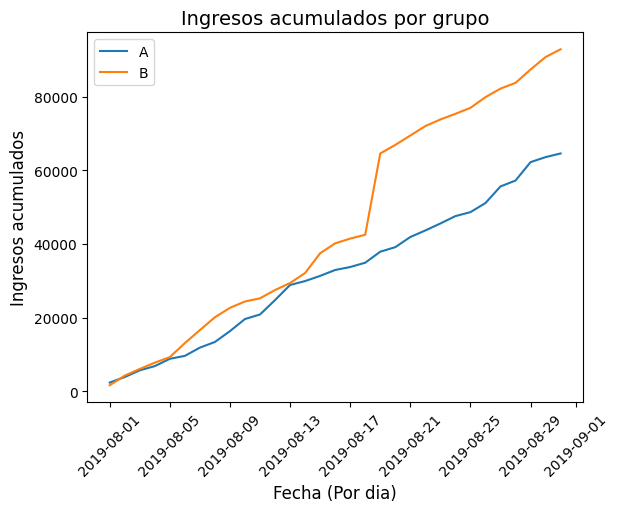

In [34]:
# Trazar el gráfico de ingresos del grupo A
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Trazar el gráfico de ingresos del grupo B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()

# Ajustar el tamaño de la fuente de las etiquetas del eje x
plt.xticks(fontsize=10, rotation=45)  # Cambia 'fontsize' para ajustar el tamaño y 'rotation' para inclinar las etiquetas

# Agregar etiquetas a los ejes
plt.xlabel('Fecha (Por dia)', fontsize=12)
plt.ylabel('Ingresos acumulados', fontsize=12)

# Título opcional
plt.title('Ingresos acumulados por grupo', fontsize=14)

#### 3.1.2 Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas. <a id='as10'></a>

Text(0.5, 1.0, 'Promedio acumulado por grupo')

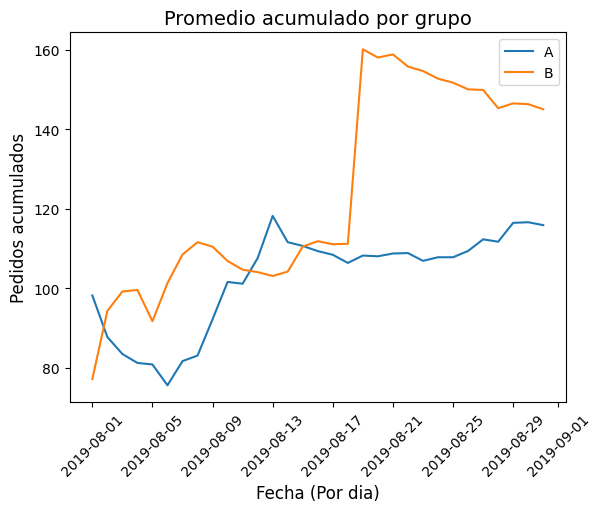

In [35]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['transactionId'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['transactionId'], label='B')

plt.legend()

# Ajustar el tamaño de la fuente de las etiquetas del eje x
plt.xticks(fontsize=10, rotation=45)  # Cambia 'fontsize' para ajustar el tamaño y 'rotation' para inclinar las etiquetas

# Agregar etiquetas a los ejes
plt.xlabel('Fecha (Por dia)', fontsize=12)
plt.ylabel('Pedidos acumulados', fontsize=12)

# Título opcional
plt.title('Promedio acumulado por grupo', fontsize=14)

#### 3.1.3 Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas. <a id='as11'></a>

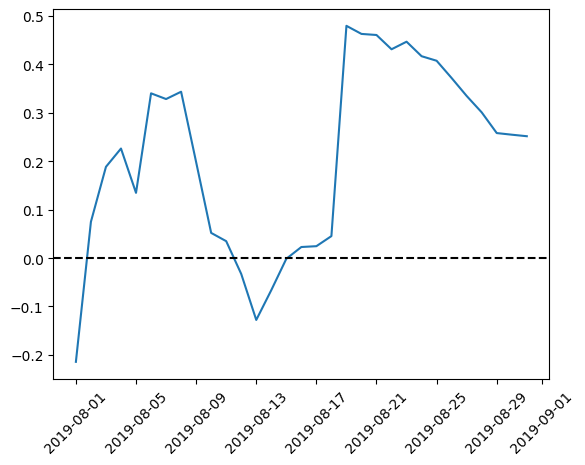

In [36]:
# Reunir los datos en un DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='right', suffixes=['A', 'B'])

# trazar un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionIdB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionIdA'])-1)

# Ajustar el tamaño de la fuente de las etiquetas del eje x
plt.xticks(fontsize=10, rotation=45)  # Cambia 'fontsize' para ajustar el tamaño y 'rotation' para inclinar las etiquetas

# agregar el eje X
plt.axhline(y=0, color='black', linestyle='--')



#### 3.1.4 Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas. <a id='as12'></a>

In [37]:
# calcular la conversión acumulada

cumulativeData['conversion'] = cumulativeData['transactionId']/cumulativeData['visitorId']

display(cumulativeData)

,transactionId,visitorId,date,group,revenue,visits,conversion
0,24,20,2019-08-01,A,2356.8,719,1.200000
1,21,20,2019-08-01,B,1620.0,713,1.050000
2,44,38,2019-08-02,A,3860.3,1338,1.157895
3,45,43,2019-08-02,B,4243.8,1294,1.046512
4,68,62,2019-08-03,A,5675.5,1845,1.096774
...,...,...,...,...,...,...,...
57,596,544,2019-08-29,B,87343.0,17708,1.095588
58,545,493,2019-08-30,A,63563.5,18037,1.105477
59,620,567,2019-08-30,B,90736.3,18198,1.093474
60,557,503,2019-08-31,A,64554.9,18736,1.107356


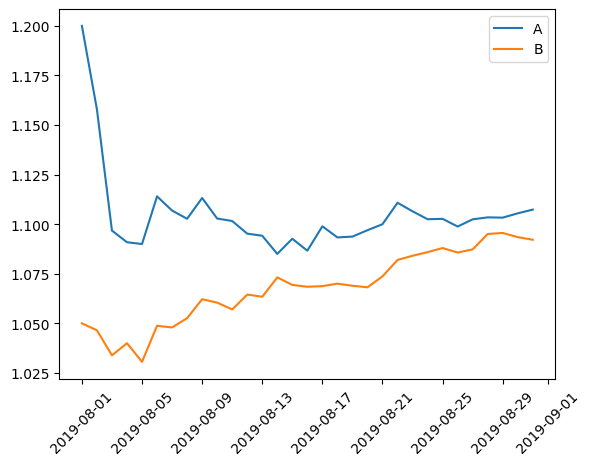

In [38]:
# seleccionar datos en el grupo A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# seleccionar datos en el grupo B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# trazar los gráficos
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')


# Ajustar el tamaño de la fuente de las etiquetas del eje x
plt.xticks(fontsize=10, rotation=45)  # Cambia 'fontsize' para ajustar el tamaño y 'rotation' para inclinar las etiquetas


plt.legend()

#### 3.1.5 Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas. <a id='as13'></a>

In [39]:
transactionByUsers = cumulativeData.groupby('visitorId',as_index=False).agg({'transactionId': 'nunique'})

display(transactionByUsers.sort_values(by='transactionId').head(10))


,visitorId,transactionId
1,38,1
2,43,1
3,59,1
4,62,1
6,77,1
5,75,1
7,98,1
8,100,1
13,159,1
9,114,1


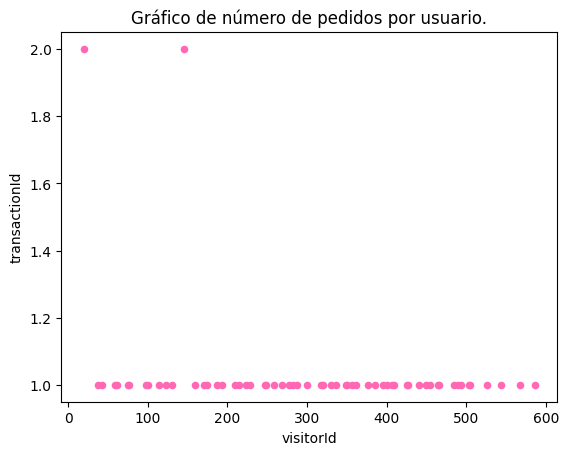

In [40]:
transactionByUsers.plot.scatter(x='visitorId', y='transactionId', color='hotpink', title='Gráfico de número de pedidos por usuario.')
plt.show()

#### 3.1.6 Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía. <a id='as14'></a>

In [41]:
print('Percentiles 90/95:',np.percentile(transactionByUsers['transactionId'], [90, 95]))

Percentiles 90/95: [1. 1.]


**Observación:** Nuestos percetiles nos indica que el 95% y el 99% de los usuarios realizaron como máximo 1 transacción. Dado que mi percentil 99 es 1, establezco como limite superior 1.

#### 3.1.7 Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.<a id='as15'></a>

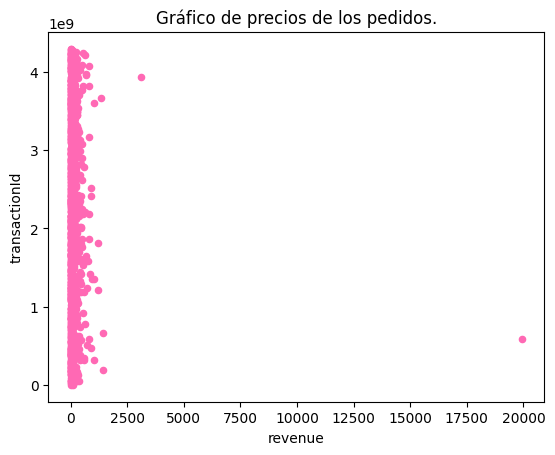

In [42]:
orders.plot.scatter(x='revenue', y='transactionId', color='hotpink', title='Gráfico de precios de los pedidos.')
plt.show()

#### 3.1.8 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas. <a id='as16'></a>

In [43]:
#  Calcular el número de transacciones únicas realizadas por visitante, del grupo A.

ordersByUserA = orders[orders['group']=='A'].groupby('visitorId',as_index=False).agg({'transactionId':'nunique'})

display(ordersByUserA)

,visitorId,transactionId
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [44]:
#  Calcular el número de transacciones únicas realizadas por visitante, del grupo B.

ordersByUserB = orders[orders['group']=='B'].groupby('visitorId',as_index=False).agg({'transactionId':'nunique'})

display(ordersByUserB)

,visitorId,transactionId
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [45]:
# Crear muestra para el grupo A

sampleA = pd.concat(
    [
        ordersByUserA['transactionId'], # Transacciones reales (usuarios que compraron)
        pd.Series(
            0,# Usuarios que no compraron (debemos incluir para la muestra todos los usuarios, incluso aquellos sin transacciones)
            index=np.arange(
                
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUserA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

# Crear muestra para el grupo B

sampleB = pd.concat(
    [
        ordersByUserB['transactionId'],# Transacciones reales (usuarios que compraron)
        pd.Series(
            0,# Usuarios que no compraron (debemos incluir para la muestra todos los usuarios, incluso aquellos sin transacciones)
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUserB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

In [46]:
# Realizar el test de Mann-Whitney

print('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


#### 3.1.9 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas. <a id='as17'></a>

In [47]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(  # Evalúa la distribución de los ingresos (revenue) entre los grupos A y B
            orders[orders['group'] == 'A']['revenue'], # filtramos por ingresos por pedidos del grupo A
            orders[orders['group'] == 'B']['revenue'], # filtramos por ingresos por pedidos del grupo B
        )[1]
    )
)
print(
    '{0:.3f}'.format(
        orders[orders['group'] == 'B']['revenue'].mean() # Calculamos el promedio y dividimos
        / orders[orders['group'] == 'A']['revenue'].mean() 
        - 1
    )
)

0.692
0.252


#### 3.1.10 Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas. <a id='as18'></a>

In [48]:
# Calcular media y desviación estándar
media_revenue = orders['revenue'].mean()
std_revenue = orders['revenue'].std()

# Definir un límite basado en 3 desviaciones estándar
limite_superior = media_revenue + 3 * std_revenue

print(f"Límite superior (3 sigmas): {limite_superior}")

# Filtrar pedidos caros según el límite
pedidos_caros = orders[orders['revenue'] > limite_superior]


Límite superior (3 sigmas): 1940.505833974155


In [49]:
# Dado a los resultados de nuestro percentil 90 y 95 filtramos pedidos mayores a 1

usersWithManyOrders = pd.concat(
    [
        ordersByUserA[ordersByUserA['transactionId'] > 1]['visitorId'], # Filtramos usuarios con más de 1 transacción, grupo A
        ordersByUserB[ordersByUserB['transactionId'] > 1]['visitorId'], # Filtramos usuarios con más de 1 transacción, grupo B
    ],
    axis=0,
)

# Dado a el resultado de nuestro limite superior de las 3 sigmas, tomamos como limite superior el monto de 1940

usersWithExpensiveOrders = orders[orders['revenue'] > 1940]['visitorId']


# Se combinan usuarios con mas de 1 transaccion y con monto de pedido muy alto ( usuarios "anómalos") y serán excluidos del análisis

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUserA[
            np.logical_not(ordersByUserA['visitorId'].isin(abnormalUsers)) # Se seleccionan los transactionId del grupo A, excluyendo los usuarios anómalos 
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUserA['transactionId']) # Se asegura que se incluyan los visitantes que no realizaron transacciones.
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUserB[
            np.logical_not(ordersByUserB['visitorId'].isin(abnormalUsers)) # Se seleccionan los transactionId del grupo B, excluyendo los usuarios anómalos 
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUserB['transactionId'])  # Se asegura que se incluyan los visitantes que no realizaron transacciones.
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

# Realizar el test de Mann-Whitney

print(
    "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
)
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.01478
0.164


#### 3.10.11 Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas. <a id='as19'></a>

In [50]:
print(
    "{0:.3f}".format(
        stats.mannwhitneyu(  # Evalúa la distribución de los ingresos (revenue) entre los grupos A y B, usando datos filtrados
            orders[
                np.logical_and(
                    orders['group'] == 'A',  # Se selecciona usuarios del grupo A, excluyendo usuarios "anómalos"
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)), 
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',  # Se selecciona usuarios del grupo B, excluyendo usuarios "anómalos"
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


print(
    "{0:.3f}".format( 
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() # Calcula el promedio de los ingresos grupo B
        / orders[ # Divide el promedio del grupo B entre el promedio del grupo A
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean() # Calcula el promedio de los ingresos grupo A
        - 1
    )
)


0.807
-0.081


#### 3.10.12 Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba. <a id='as20'></a>